In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#datetime lib
from pandas import to_datetime
import itertools
import datetime
import warnings
warnings.filterwarnings('ignore')

# to change scientific numbers to float
np.set_printoptions(formatter={'floatkind' : '{:f}'.format})

#increase the size of snsplot
sns.set(rc={'figure.figsize':(8,6)})

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
#import the datasets
df=pd.read_csv('churn_raw_data.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Datapreprocessing
# calculate the unique values and length of the rows
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


In [5]:
# check for the null values
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# Now only considering the numeric values and exclude the less important column for model building
new= df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
        'IsActiveMember', 'EstimatedSalary', 'Exited']]

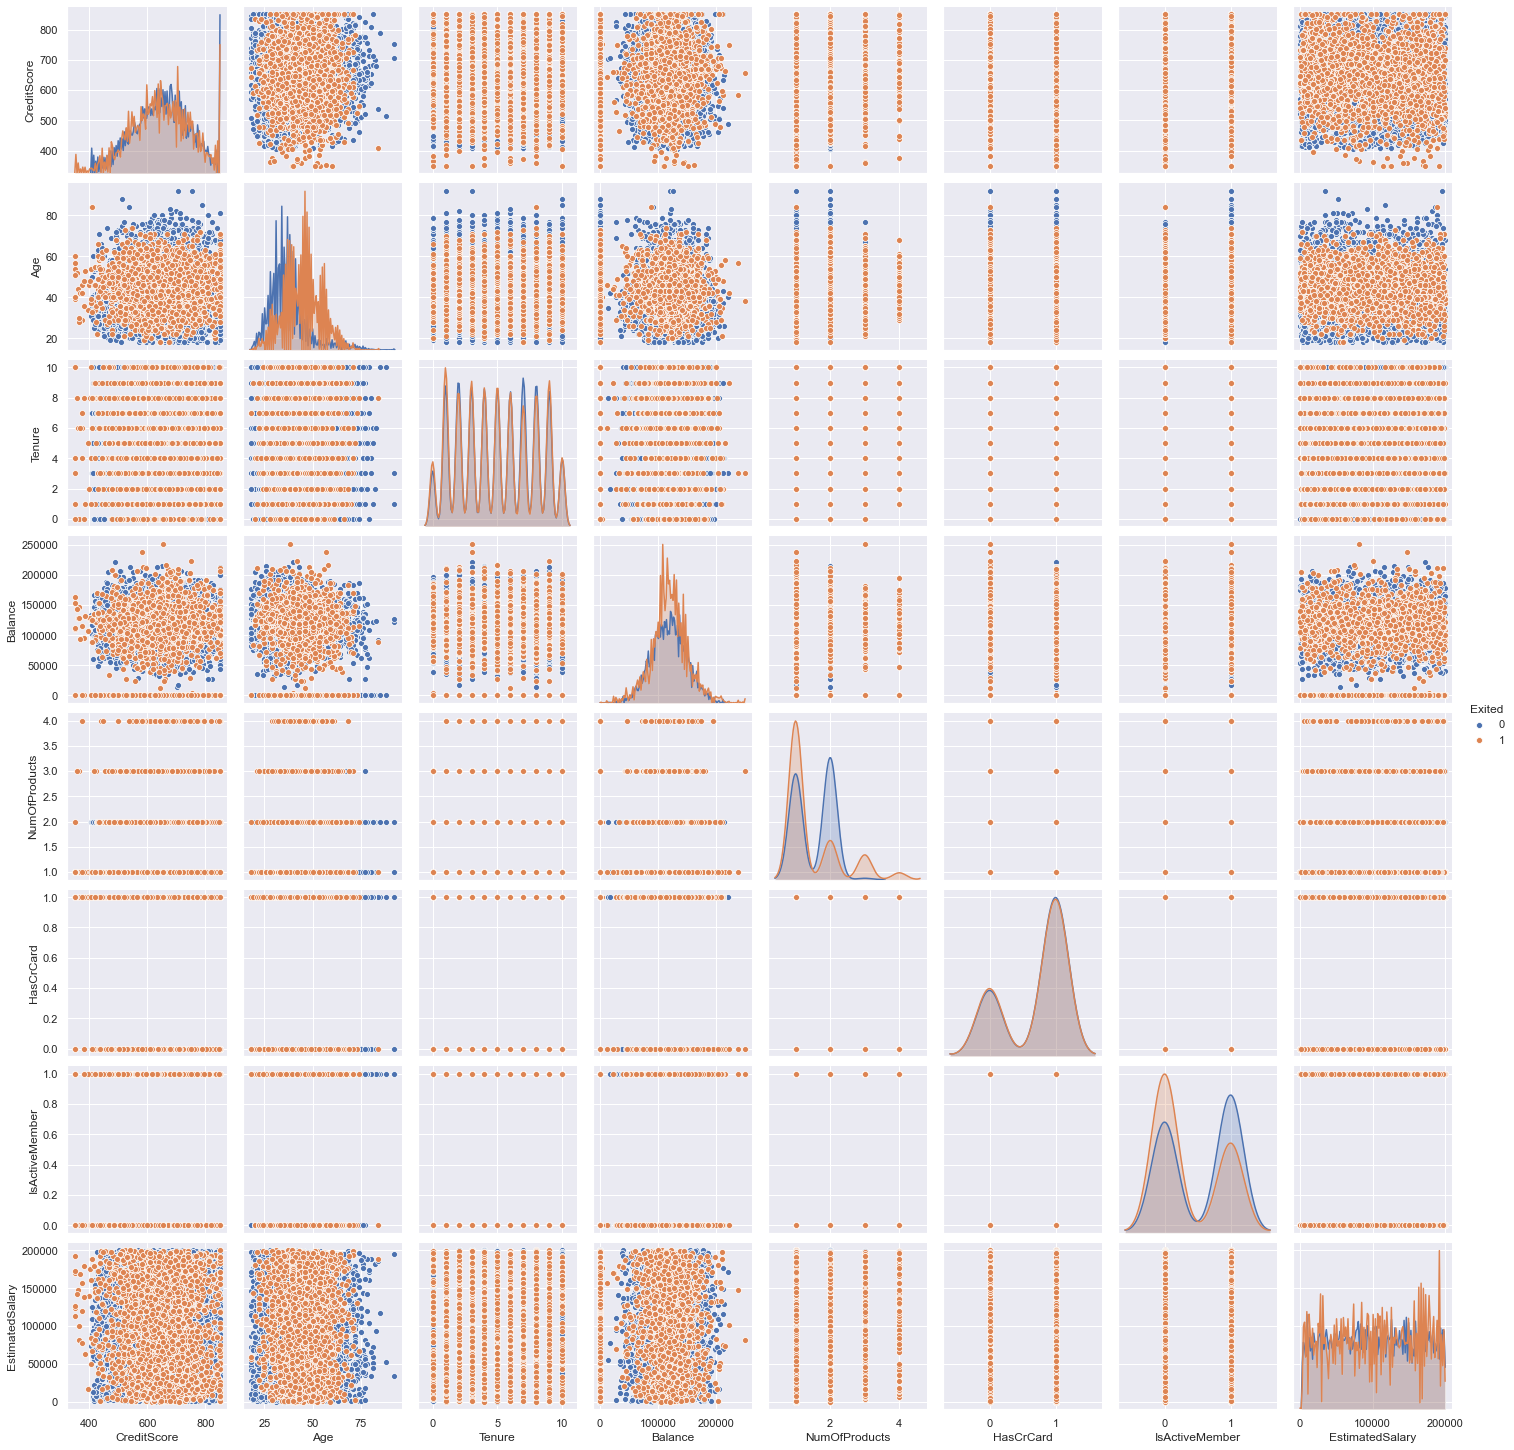

In [8]:
# visualizing data through seaborn pairplots
g=sns.pairplot(new, hue='Exited', diag_kws={'bw': 0.2})

In [9]:
#plots of non-numeric features
features= ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

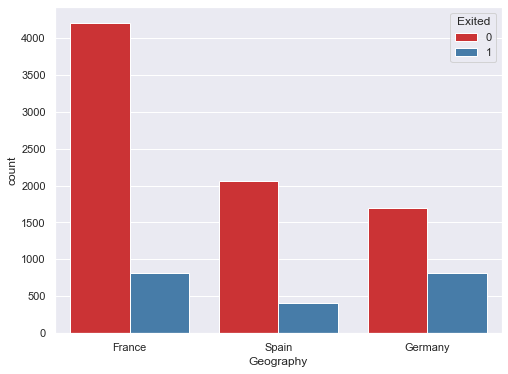

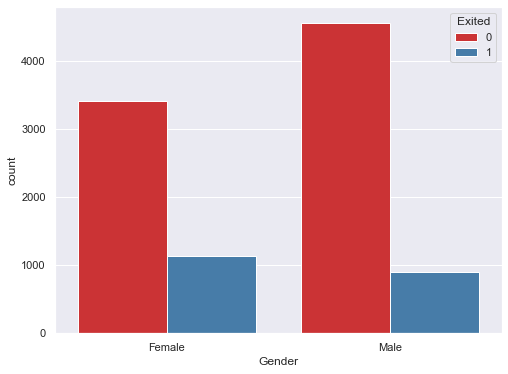

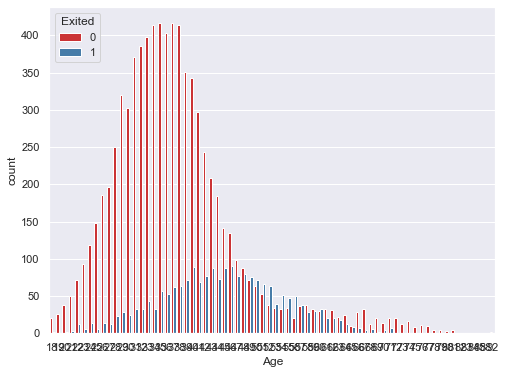

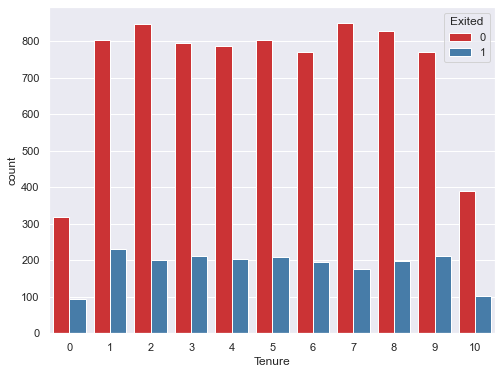

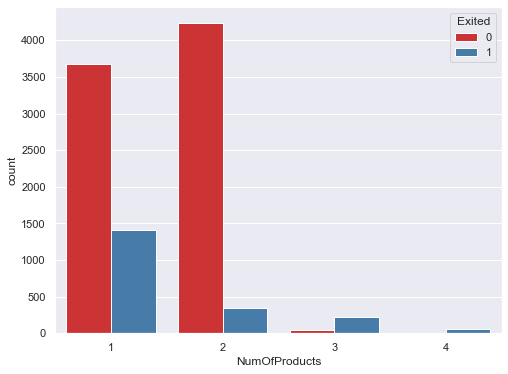

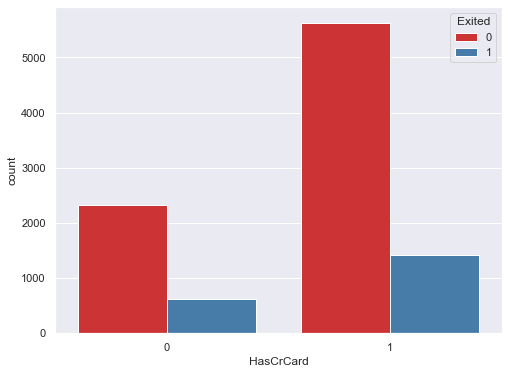

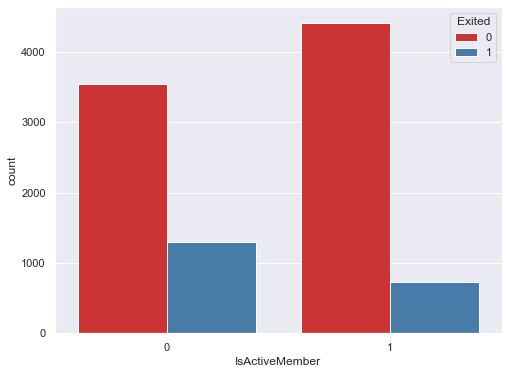

In [10]:
for f in features:
    plt.figure()
    ax=sns.countplot(x=f, data=new, hue='Exited', palette='Set1')

In [11]:
# convert catagorical variables into numeric variables
new1= pd.get_dummies(new, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
new1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [12]:
#scaling our columns
scale_col=['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler=MinMaxScaler()
new1[scale_col]=scaler.fit_transform(new1[scale_col])
new1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


In [13]:
x=new1.drop('Exited', axis=1).values # input features
y=new1['Exited'].values # Target vector

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [15]:
x.shape, y.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10000, 15), (10000,), (7500, 15), (7500,), (2500, 15), (2500,))

In [16]:
new1.drop('Exited', axis=1).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'HasCrCard_0',
       'HasCrCard_1', 'IsActiveMember_0', 'IsActiveMember_1'],
      dtype='object')

### Decision Tree

In [17]:
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)

In [18]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[1979,   12],
       [ 438,   71]], dtype=int64)

In [19]:
# accuracy score
accuracy_score(y_test, y_pred)

0.82

In [20]:
# cross_validation score
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, x_train, y_train, cv=5).mean()

0.8157333333333334

In [21]:
# let's print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1991
           1       0.86      0.14      0.24       509

    accuracy                           0.82      2500
   macro avg       0.84      0.57      0.57      2500
weighted avg       0.83      0.82      0.76      2500



In [22]:
#calculate the feature importance
for i, column in enumerate(new1.drop('Exited', axis=1)):
    print('Importance of feature {}: {:.3f}'.format(dtc, dtc.feature_importances_[i]))
    fi=pd.DataFrame({'variable': [column], 'Feature Importance Score': [dtc.feature_importances_[i]]})
    try:
        final_fi=pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi=fi
#ordering the data
final_fi=final_fi.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.000
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.630
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.000
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.000
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.370
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.000
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.000
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.000
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1): 0.000
Importance of feature DecisionTreeClassifier(criterion='entropy', max_depth=2, ran

,index,variable,Feature Importance Score
0,1,Age,0.629855
1,4,NumOfProducts,0.370145
2,0,CreditScore,0.000000
3,2,Tenure,0.000000
4,3,Balance,0.000000
5,5,EstimatedSalary,0.000000
6,6,Geography_France,0.000000
7,7,Geography_Germany,0.000000
8,8,Geography_Spain,0.000000
9,9,Gender_Female,0.000000


In [23]:
#Accuracy on train
print("Training Accuracy is: ", dtc.score(x_train, y_train))

Training Accuracy is:  0.8196


In [24]:
#Accuracy on test
print("Testing Accuracy is: ", dtc.score(x_test, y_test))

Testing Accuracy is:  0.82


### Visualizing Confusion matrix

In [25]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

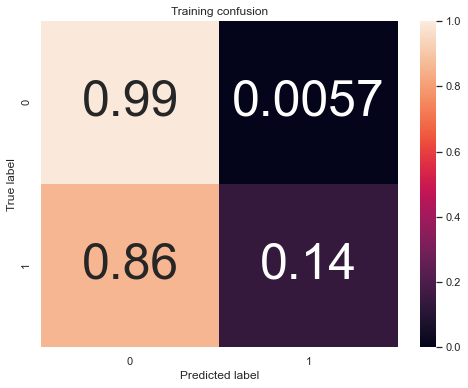

In [26]:
y_pred=dtc.predict(x_train)
cm=confusion_matrix(y_train, y_pred)
cm_norm=cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion')

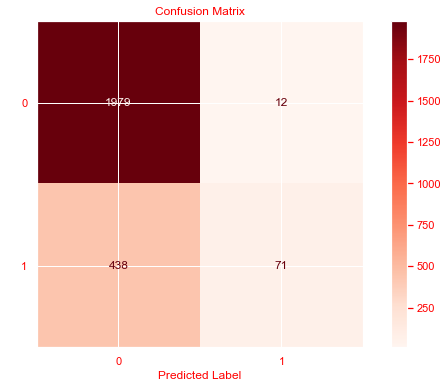

In [27]:
# visualize the confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix= plot_confusion_matrix(dtc, x_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='Red')
plt.xlabel('Predicted Label', color='Red')
plt.ylabel('true label', color='white')
plt.gcf().axes[0].tick_params(colors='Red')
plt.gcf().axes[1].tick_params(colors='Red')
plt.gcf().set_size_inches(10,6)
plt.show()